# 모델 훈련

선형 회귀 모델릉 훈련시키는 두가지 방법
* 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 잘 맞는 모델 파라미터 구하기
* 경사하강법을 이용하여 모델 파라미터를 수정하며 비용함수를 train set에 대해 최소화 시키기
= 결국 앞의 방법과 동일한 파라미터로 수렴함

비선형 데이터셋에 훈련시킬 수 있는 다항회귀
* 선형 회귀에 비해 parameter가 많아서 훈련 데이터에 과대적합하기 쉬움
* learning curve를 이용해 모델이 과대적합되는지 감지하기

## 4.1 선형회귀
* 모델을 훈련시킨다는 것은 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것
* 회귀에서 가장 널리 사용되는 성능 측정 지표는 RMSE(평균 제곱근 오차)

## 4.1.1 정규방정식
* 비용함수를 최소화하는 parameter를 찾기 위한 해석적인 방법

C:\Users\MYCOM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

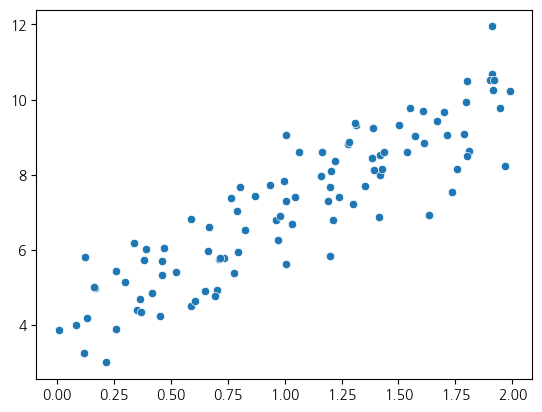

In [99]:
import numpy as np
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)
import seaborn as sns
sns.scatterplot(X[:,0],y[:,0])

In [100]:
# 정규방정식 사용해서 parameter 계산하기
X_b=np.c_[np.ones((100,1)),X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [101]:
theta_best

array([[3.89169322],
       [3.1596082 ]])

In [102]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 3.89169322],
       [10.21090962]])

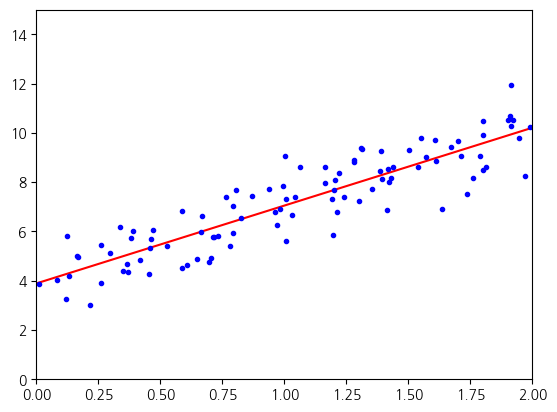

In [103]:
import matplotlib.pyplot as plt
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [104]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.89169322]), array([[3.1596082]]))

In [105]:
lin_reg.predict(X_new)

array([[ 3.89169322],
       [10.21090962]])

In [106]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(X_b,y,rcond=1e-6)
# 함수 직접 호출하기 
theta_best_svd

array([[3.89169322],
       [3.1596082 ]])

In [107]:
np.linalg.pinv(X_b).dot(y)

array([[3.89169322],
       [3.1596082 ]])

## 4.1.2 계산 복잡도
* 정규방정식은 (n+1)x(n+1) 크기의 X.T*X 의 역행렬을 계산함
* 일반적으로 이때 n이 두배로 들어나면 계산 시간이 8배 증가
* 사이킷런 LinearRegression클래스의 SVD에선 n이 두배로 늘어나면 계산 시간이 4배가 됨

## 4.2 경사 하강법
* 비용 함수를 최소화하기 위해 반복적으로 파라미터를 조정해가는 것
* 경사 하강법에서 가장 중요한 parameter는 learning rate로 learning rate(step의 크기)가 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸림
* learning rate가 너무 크면 알고리즘을 더 큰 값으로 발산하게 만들어 적절한 해법을 찾지 못함
* 선형 회귀를 위한 MSE 비용함수는 볼록함수로 지역 최솟값이 없고 하나의 전역 최솟값만 있음

## 4.2.1 배치 경사 하강법
* 편도함수 = r각 모델 parameter가 변경될 때 비용 함수가 얼마나 바뀌는지 계산

In [108]:
eta=0.1 # 학습률
n_iterations=1000
m=100
theta=np.random.randn(2,1) # 무작위 초기화
for iteration in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients

theta

array([[3.89169322],
       [3.1596082 ]])

In [109]:
# 적절한 learning rate를 찾기 위해 GridSearch 이용
# 이때 Grid Search에서 수렴하는데 시간이 걸리는 것을 막기 위해 반복횟수 제한

## 4.2.2 확률적 경사 하강법
* 매 스탭에서 한개의 샘플을 무작위로 선택학 그 하나의 샘플에 대한 gradient 계산
* 매 반복에서 다뤄야할 데이터가 매우 적기 때문에 한번에 하나의 샘플만 처리, 알고리즘이 빨라짐 + 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련시킬 수 있음
* 무작위성으로 인해 지역 최솟값에서 탈출하기 좋음. 이 때 전역 최솟값에 다다르게 하기 위해 learningrate를 점진적으로 감소시켜야 함
* 매 반복에서 learingrate를 결정하는 함수 learning schedule

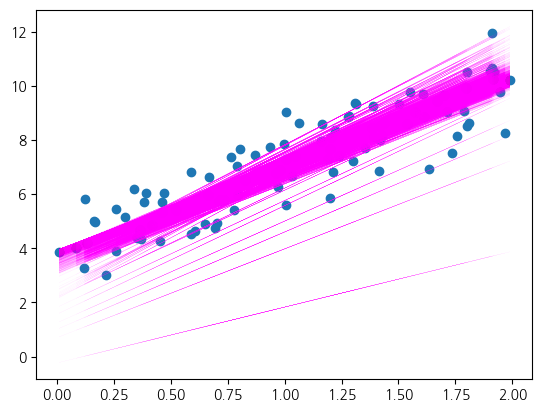

In [111]:
n_epochs=50
t0,t1=5,50 # 학습 스케줄 파라미터
def learning_schedule(t):
    return t0/(t+t1)

theta=np.random.randn(2,1) # 무작위 초기화
for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients
        plt.plot(X[:,0],theta[0,0]+theta[1,0]*X[:,0],color='magenta',linewidth=0.01)
        
plt.scatter(X[:,0],y[:,0])

In [112]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_,sgd_reg.coef_

(array([3.94448075]), array([3.25664425]))

## 4.2.3 미니배치 경사 하강법
* 미니배치라고 부르는 임의의 작은 샘플 세트에 대해 gradient를 계산
* 미니배치를 적절히 크게 하면 알고리즘은 parameter space에서 SGD보다 덜 불규칙하게 움직일 것. 하지만 지역 최솟값에서 빠져나오기 힘들지도

## 4.3 다항회귀

C:\Users\MYCOM\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


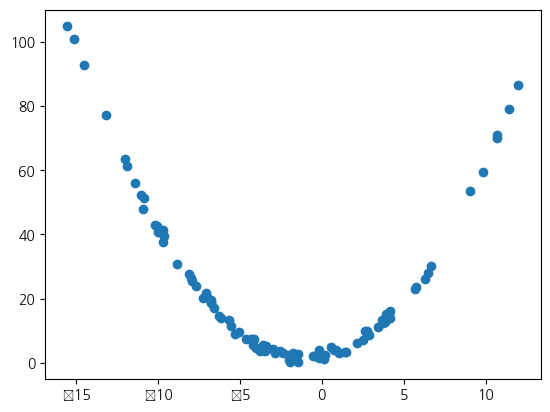

In [113]:
# 2차 방정식으로 비정형 데이터 생성
m=100
X=6*np.random.randn(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)
plt.scatter(X,y)

In [114]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]

array([-5.03373288])

In [115]:
X_poly[0]

array([-5.03373288, 25.3384667 ])

In [116]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.0501964]), array([[0.99981494, 0.49972297]]))

In [117]:
lin_reg.intercept_[0]

2.050196400842541

In [118]:
lin_reg.coef_[0,1]

0.49972296569957736

In [119]:
b0=lin_reg.intercept_[0]
b1=lin_reg.coef_[0,0]
b2=lin_reg.coef_[0,1]

C:\Users\MYCOM\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


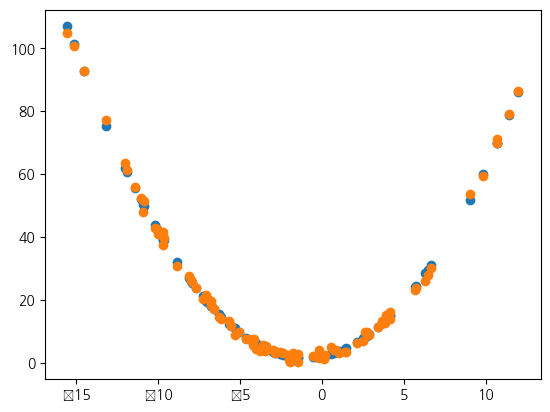

In [120]:
plt.scatter(X,b0+b2*X**2+b1*X)
plt.scatter(X,y)

## 4.4 학습곡선
* 어떻게 모델이 데이터에 과대적합 또는 과소적합되었는지 확인
* 훈련세트와 검증세트의 모델 성능을 훈련 세트 크기의 함수로 나타냄

In [121]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 주어진 훈련 데이터에서 모델의 학습 곡선을 그리는 함수를 정의
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
    train_errors,val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='훈련 세트')
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='검증 세트')    

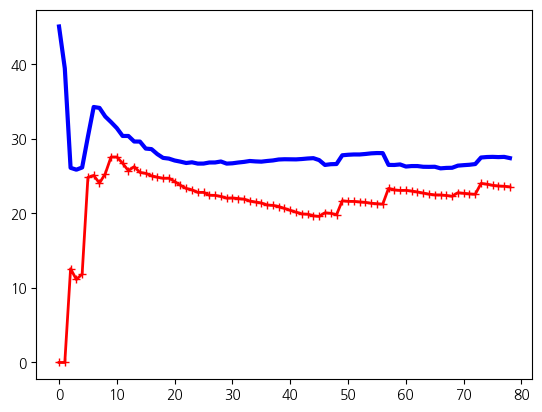

In [122]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)
# 과소적합 모델의 전형적인 모습임. 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해있음
# 과소적합이 되어있을 경우 훈련 샘플을 추가해도 효과가 없음
# solution) 더 복잡한 모델을 만들거나 더 나은 특성을 선택해야

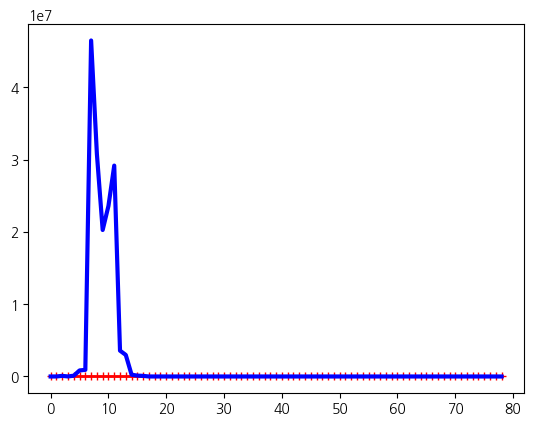

In [126]:
# 10차 다항 회귀모델의 학습 곡선 만들기
from sklearn.pipeline import Pipeline
polynomial_regression=Pipeline([('poly_features',PolynomialFeatures(degree=10,include_bias=False)),
                               ('lin_reg',LinearRegression())])

plot_learning_curves(polynomial_regression,X,y)
# 두 곡선 사이의 공간이 있다는 건 과대적합 모델의 특징
# 더 큰 훈련세트를 이용하면 두 곡선이 점점 가까워짐

## 4.5 규제가 있는 선형 모델
* 과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것
* 즉 모델을 제한하는 것. 자유도를 줄이는 것.
* 다항 회귀 모델에서 규제한다는 것은 다항식의 차수를 감소시키는 것
* 선형 회귀 모델에서 규제한다는 것은 모델의 가중치를 제한한다는 것

## 4.5.1 릿지 회귀
* 규제가 추가된 선형 회귀 버전 > 규제항이 비용함수에 추가됨
* 하이퍼파라미터 a는 모델을 얼마나 많이 규제할 것인지 조절
* a=0이면 릿지 회귀는 선형 회귀와 같아짐. a가 아주 클 경우 모든 가중치가 0에 가까워지고 데이터의 평균을 지나는 수평선이 됨
* 릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 수행하기 전에 데이터의 스케일을 맞추는 것이 굉장히 중요

In [128]:
# 선형방정식을 이용한 릿지 회귀
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[18.1907417]])

In [131]:
# 확률적 경사 하강법을 이용한 릿지 회귀
sgd_reg=SGDRegressor(penalty='l2')
## penalty로 사용할 규제 지정
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([15.90116762])

## 4.5.2 라쏘 회귀
* 규제가 추가된 선형 회귀 버전 > 규제항이 비용함수에 추가됨
* 덜 중요한 특성의 가중치를 제거함
* 경사하강법이 최적점 근처에서 진동하는 것을 막기 위해선 훈련하는 동안 점진적으로 learning rate를 감소시켜야 함

In [132]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([18.20055823])

## 4.5.3 엘라스틱넷
* 규제항은 릿지와 라쏘 회귀의 규제항을 단순히 더함. 혼합 정도 r로 조절
* r=0이면 릿지 회귀, r=1이면 라쏘 회귀
* 일반적으로 선형<릿지 선호, 쓰이는 특성이 몇개뿐이라고 의심되면 라쏘&엘라스틱,n이 훈련샘플수보다 많거나 특성 몇개가 강하게 연관되어있을 때는 라쏘<엘라스틱넷

In [133]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([18.19994733])

## 4.5.4 조기 종료
* early stopping: 검증 에러가 최솟값에 도달하면 바로 훈련을 정지시킴

In [136]:
from sklearn.preprocessing import StandardScaler

In [138]:
from sklearn.base import clone
# 조기 종료
'''
poly_scaler=Pipeline([('poly_features',PolynomialFeatures(degree=90,include_bias=False)),('std_scaler',StandardScaler())])
X_train_poly_scaled=poly_scaler.fit_transform(X_train)
X_val_poly_scaled=poly_scaler.transform(X_val)
sgd_reg=SGDRegressor(max_iter=1,tol=-np.infty,warm_start=True,penalty=None,
                    learning_rate='constant',eta0=0.0005)
minimum_val_error=float('inf')
best_epoch=None
best_model=None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_val_predict=sgd_reg.predict(X_val_poly_scaled)
    val_error=mean_squared_error(y_val,y_val_predict)
    if val_error<minimum_val_error:
        minimum_val_error=val_error
        best_epoch=epoch
        best_model=clone(sgd_reg)
'''
# 조기종료를 위한 기본적인 구현 코드

"\npoly_scaler=Pipeline([('poly_features',PolynomialFeatures(degree=90,include_bias=False)),('std_scaler',StandardScaler())])\nX_train_poly_scaled=poly_scaler.fit_transform(X_train)\nX_val_poly_scaled=poly_scaler.transform(X_val)\nsgd_reg=SGDRegressor(max_iter=1,tol=-np.infty,warm_start=True,penalty=None,\n                    learning_rate='constant',eta0=0.0005)\nminimum_val_error=float('inf')\nbest_epoch=None\nbest_model=None\nfor epoch in range(1000):\n    sgd_reg.fit(X_train_poly_scaled,y_train)\n    y_val_predict=sgd_reg.predict(X_val_poly_scaled)\n    val_error=mean_squared_error(y_val,y_val_predict)\n    if val_error<minimum_val_error:\n        minimum_val_error=val_error\n        best_epoch=epoch\n        best_model=clone(sgd_reg)\n"

## 4.6 로지스틱 회귀
* 샘플이 특정 클래스에 속활 확률을 추정하는데 사용됨 

## 4.6.1 확률 추정
* 선형 회귀 모델고 같이 입력 특성의 가중치 합을 계산. but결과를 바로 출력하지 않고 결괏값의 logistic을 출력
* 양수일 때 1(양성 클래스), 음수일 때 0(음성 클래스)

## 4.6.2 훈련과 비용 함수
* 양성 샘플 1에 대해서는 높은 확률을 추정하고 음성 샘플0에 대해서는 낮은 확률을 추정하는 모델 파리미터 벡터를 찾아야 함

## 4.6.3 결정 경계


In [139]:
from sklearn import datasets
iris=datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [141]:
X=iris['data'][:,3:]
y=(iris['target']==2).astype(int)

In [142]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

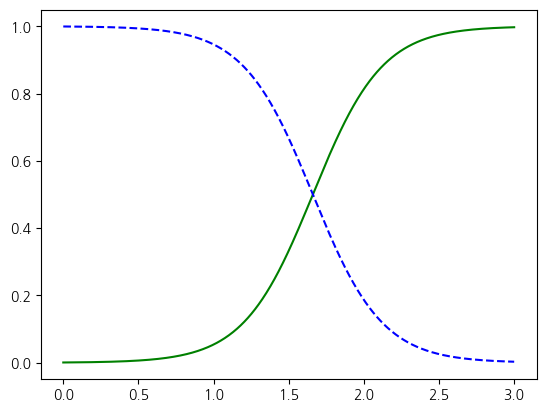

In [143]:
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],'g-',label='Iris Virginica')
plt.plot(X_new,y_proba[:,0],'b--',label='Not Iris Virginica')

In [144]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

## 4.6.4 소프트맥스 회귀
* 여러개의 이진분류기를 연결하지 않고 직접 다중 클래스를 지원
* 각 클래스의 확률을 추정. 가장 추정 확률이 높은 클래스를 선택

In [160]:
iris=datasets.load_iris()
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [161]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [164]:
X=iris['data'][:,(2,3)]
y=iris['target']
softmax_reg=LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [165]:
softmax_reg.predict([[5,2]])

array([2])

In [167]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])